## Mobile Price Prediction 

### Import the Libraires and Dataset

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# Import Dataset
df = pd.read_csv("results.csv")
df.head()

,Phone_name,Phone_Prices,Phone_Ratings,Phone_RAM,Phone_ROM,Phone_Mobile_Size,Phone_Primary_Cam,Phone_Selfi_Cam,Phone_Battery_Power
0,Redmi Note 12 Pro 5G (8 GB / 256 GB),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Samsung Galaxy S23 Ultra,"39.995,00 TL10 site, 44 fiyat",3.8 (15 oy) / 31 yorum,12 GB,512 GB,6.8 İnç,200 MP,12 MP,5000 mAh
2,Samsung Galaxy S23 Ultra,"37.490,00 TL8 site, 23 fiyat",4.1 (45 oy) / 387 yorum,8 GB,256 GB,6.8 İnç,200 MP,12 MP,5000 mAh
3,Apple iPhone 14 Pro Max,"57.094,72 TL7 site, 32 fiyat",4.0 (1 oy) / 2 yorum,6 GB,512 GB,6.7 İnç,48 MP,12 MP,4323 mAh
4,Apple iPhone 14 Pro Max,"46.987,99 TL9 site, 46 fiyat",4.6 (4 oy) / 12 yorum,6 GB,256 GB,6.7 İnç,48 MP,12 MP,4323 mAh


### Data Preprocessing

In [4]:
# Checking null values into the dataset
df.isnull().sum()

Phone_name             0
Phone_Prices           8
Phone_Ratings          8
Phone_RAM              8
Phone_ROM              8
Phone_Mobile_Size      8
Phone_Primary_Cam      8
Phone_Selfi_Cam        8
Phone_Battery_Power    8
dtype: int64

<Axes: >

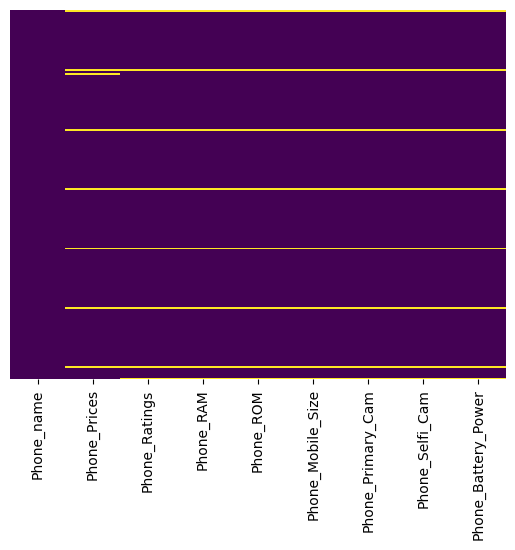

In [5]:
# Seeing the null values using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Phone_name           199 non-null    object
 1   Phone_Prices         191 non-null    object
 2   Phone_Ratings        191 non-null    object
 3   Phone_RAM            191 non-null    object
 4   Phone_ROM            191 non-null    object
 5   Phone_Mobile_Size    191 non-null    object
 6   Phone_Primary_Cam    191 non-null    object
 7   Phone_Selfi_Cam      191 non-null    object
 8   Phone_Battery_Power  191 non-null    object
dtypes: object(9)
memory usage: 14.1+ KB


In [7]:
df["Phone_RAM"] = df["Phone_RAM"].str[:-2]
df["Phone_ROM"] = df["Phone_ROM"].str[:-2]
df["Phone_Mobile_Size"] = df["Phone_Mobile_Size"].str[:3]
df["Phone_Primary_Cam"] = df["Phone_Primary_Cam"].str[:-2]
df["Phone_Selfi_Cam"] = df["Phone_Selfi_Cam"].str[:-2]
df["Phone_Battery_Power"] = df["Phone_Battery_Power"].str[:-3]
df["Phone_Ratings"] = df["Phone_Ratings"].str[:3]
df["Phone_Prices"] = df["Phone_Prices"].str[:2]+df["Phone_Prices"].str[3:6]

df.head()

,Phone_name,Phone_Prices,Phone_Ratings,Phone_RAM,Phone_ROM,Phone_Mobile_Size,Phone_Primary_Cam,Phone_Selfi_Cam,Phone_Battery_Power
0,Redmi Note 12 Pro 5G (8 GB / 256 GB),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Samsung Galaxy S23 Ultra,39995,3.8,12,512,6.8,200,12,5000
2,Samsung Galaxy S23 Ultra,37490,4.1,8,256,6.8,200,12,5000
3,Apple iPhone 14 Pro Max,57094,4.0,6,512,6.7,48,12,4323
4,Apple iPhone 14 Pro Max,46987,4.6,6,256,6.7,48,12,4323


In [8]:
df.dtypes

Phone_name             object
Phone_Prices           object
Phone_Ratings          object
Phone_RAM              object
Phone_ROM              object
Phone_Mobile_Size      object
Phone_Primary_Cam      object
Phone_Selfi_Cam        object
Phone_Battery_Power    object
dtype: object

In [9]:
# Describe
df.describe()

,Phone_name,Phone_Prices,Phone_Ratings,Phone_RAM,Phone_ROM,Phone_Mobile_Size,Phone_Primary_Cam,Phone_Selfi_Cam,Phone_Battery_Power
count,199,191,191,191,191,191,191,191,191
unique,137,151,30,4,4,12,8,14,49
top,Redmi Note 12 Pro 5G (8 GB / 256 GB),14500,3.8,8,256,6.6,12,32,5000
freq,4,6,16,109,90,54,56,44,41


In [10]:
# Dropping the Name columns
df.drop(['Phone_name'],axis=1,inplace=True)

### Handling Missing Values

In [11]:
# We should handling these null or missing values
df.isnull().sum()

Phone_Prices           8
Phone_Ratings          8
Phone_RAM              8
Phone_ROM              8
Phone_Mobile_Size      8
Phone_Primary_Cam      8
Phone_Selfi_Cam        8
Phone_Battery_Power    8
dtype: int64

In [12]:
df = df.dropna()
df.isnull().sum()

Phone_Prices           0
Phone_Ratings          0
Phone_RAM              0
Phone_ROM              0
Phone_Mobile_Size      0
Phone_Primary_Cam      0
Phone_Selfi_Cam        0
Phone_Battery_Power    0
dtype: int64

<Axes: >

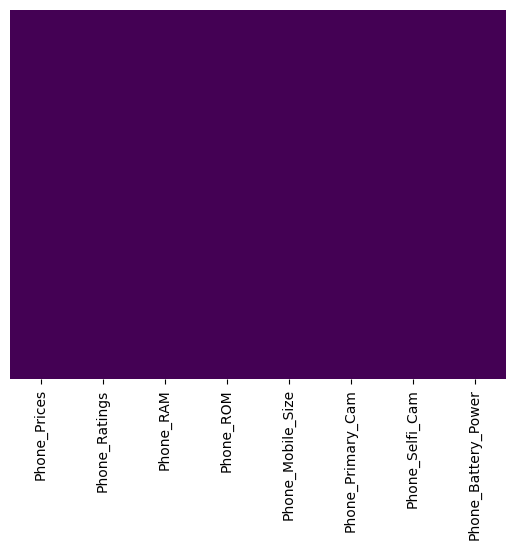

In [13]:
# We can able to see the there is no null values  
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
# Changing the Datatype
df["Phone_RAM"] = df["Phone_RAM"].astype("int64")
df["Phone_ROM"] = df["Phone_ROM"].astype("int64")
df["Phone_Mobile_Size"] = df["Phone_Mobile_Size"].astype("float")
df["Phone_Primary_Cam"] = df["Phone_Primary_Cam"].astype("int64")
df["Phone_Selfi_Cam"] = df["Phone_Selfi_Cam"].astype("int64")
df["Phone_Battery_Power"] = df["Phone_Battery_Power"].astype("int64")
df["Phone_Ratings"] = df["Phone_Ratings"].astype("float")
df["Phone_Prices"] = df["Phone_Prices"].astype("int64")

In [15]:
df.dtypes

Phone_Prices             int64
Phone_Ratings          float64
Phone_RAM                int64
Phone_ROM                int64
Phone_Mobile_Size      float64
Phone_Primary_Cam        int64
Phone_Selfi_Cam          int64
Phone_Battery_Power      int64
dtype: object

In [16]:
# Final dataset for build a model
df.head()

,Phone_Prices,Phone_Ratings,Phone_RAM,Phone_ROM,Phone_Mobile_Size,Phone_Primary_Cam,Phone_Selfi_Cam,Phone_Battery_Power
1,39995,3.8,12,512,6.8,200,12,5000
2,37490,4.1,8,256,6.8,200,12,5000
3,57094,4.0,6,512,6.7,48,12,4323
4,46987,4.6,6,256,6.7,48,12,4323
5,33847,3.6,12,512,6.8,108,40,5000


### Exploratory Data Analysis 

In [17]:
# Columns

#### Let's Understand about the Features

- **1.Phone_name** This is first feature of our dataset. It's Denotes name of the mobile phones and   Brands.</br>
- **2.Phone_Ratings** This Feature Denotes Number of the ratings gave by the consumers for each mobile.</br>
- **3.Phone_RAM** It's have RAM size of the phone. </br>
- **4.Phone_ROM** It's have ROM **(Internal Memory)** size of the phone. </br>
- **5.Phone_Mobile_Size** It's represents how many inches of the particular mobile phone have. Here all the values are gave in **inches** </br>
- **6.Phone_Primary_Cam** It's Denotes Number of the pixels of the primary camera **(Back Camera)** for each mobiles.</br>
- **7.Phone_Selfi_Cam** It's Denotes Number of the pixels of the Selfi camera **(Front Camera)** for each mobiles.</br>
- **8.Phone_Battery_Power** It's Denotes amount of the battery power in each mobiles in **mAh**.</br>
- **9.Phone_Prices** It's a Dependent Feature of the dataset. It's just denote prices of the each mobiles.


In [18]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(8, 8)

<Axes: >

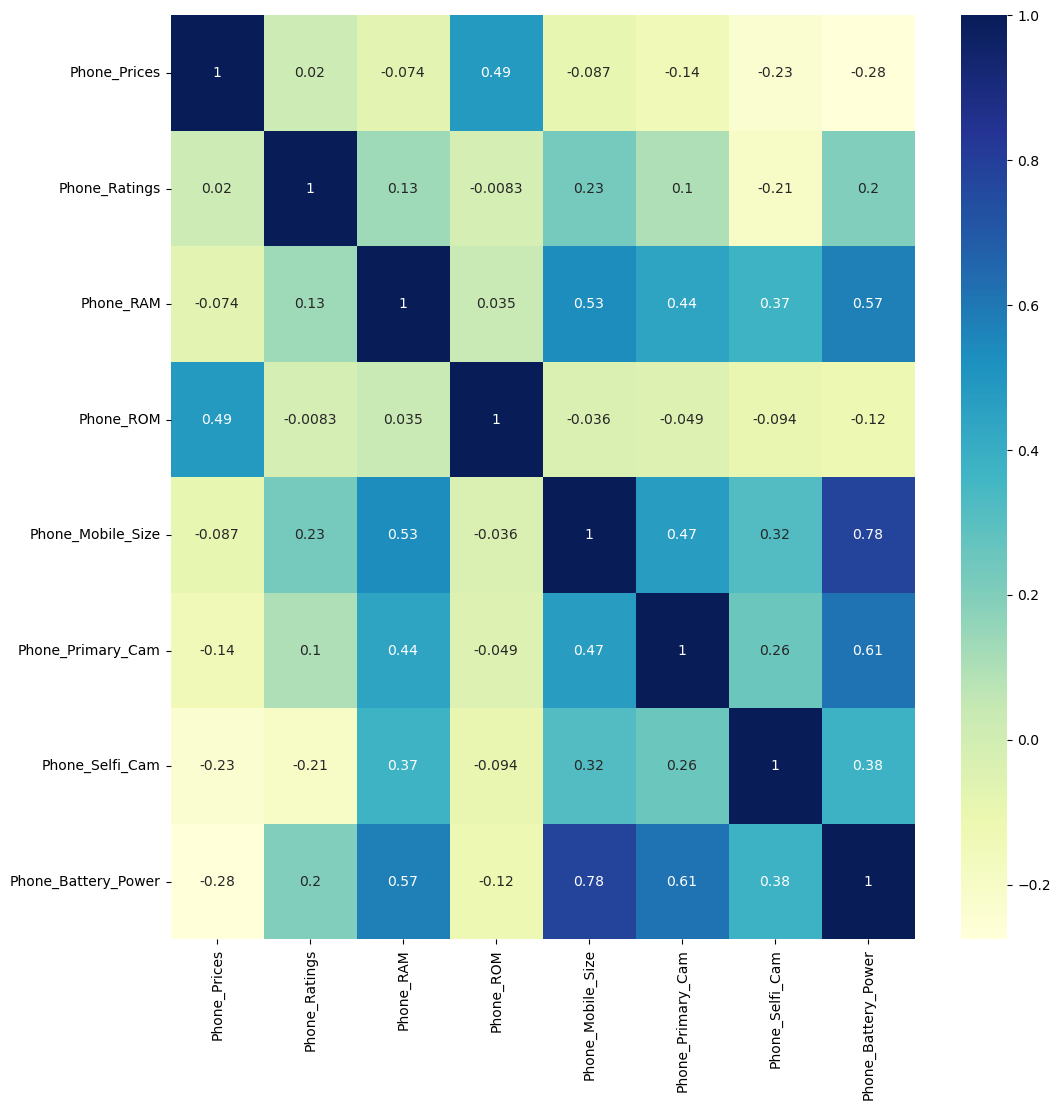

In [19]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap="YlGnBu")

<Axes: xlabel='Phone_Ratings', ylabel='count'>

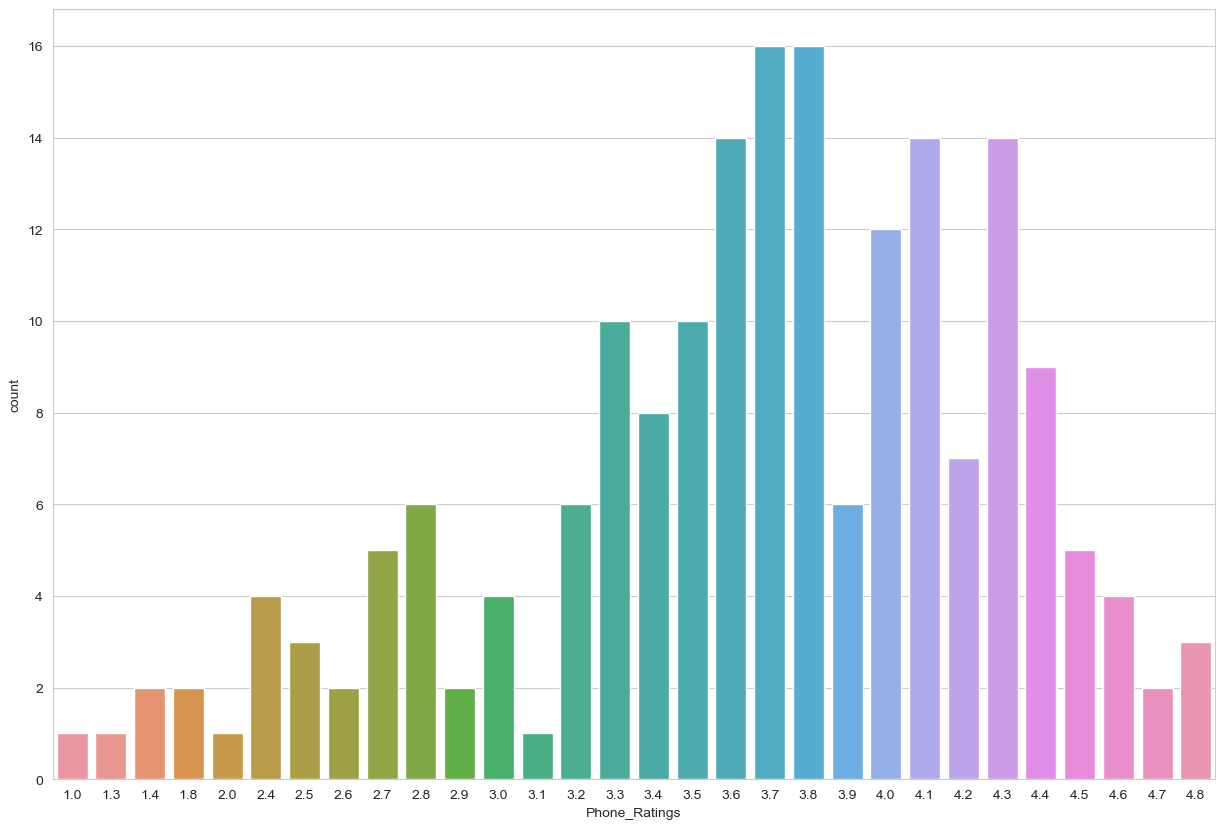

In [20]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Phone_Ratings',data=df)

<Axes: xlabel='Phone_RAM', ylabel='count'>

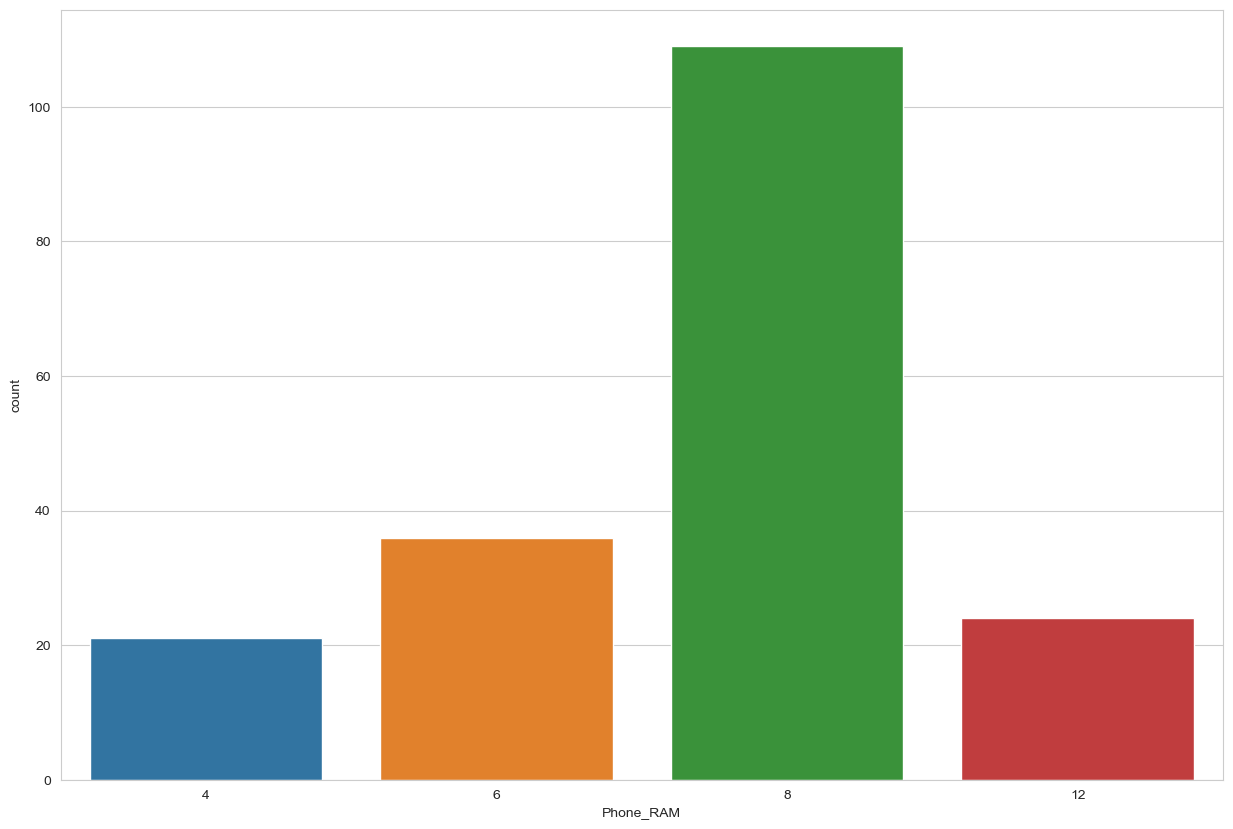

In [21]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Phone_RAM',data=df)

<Axes: xlabel='Phone_ROM', ylabel='count'>

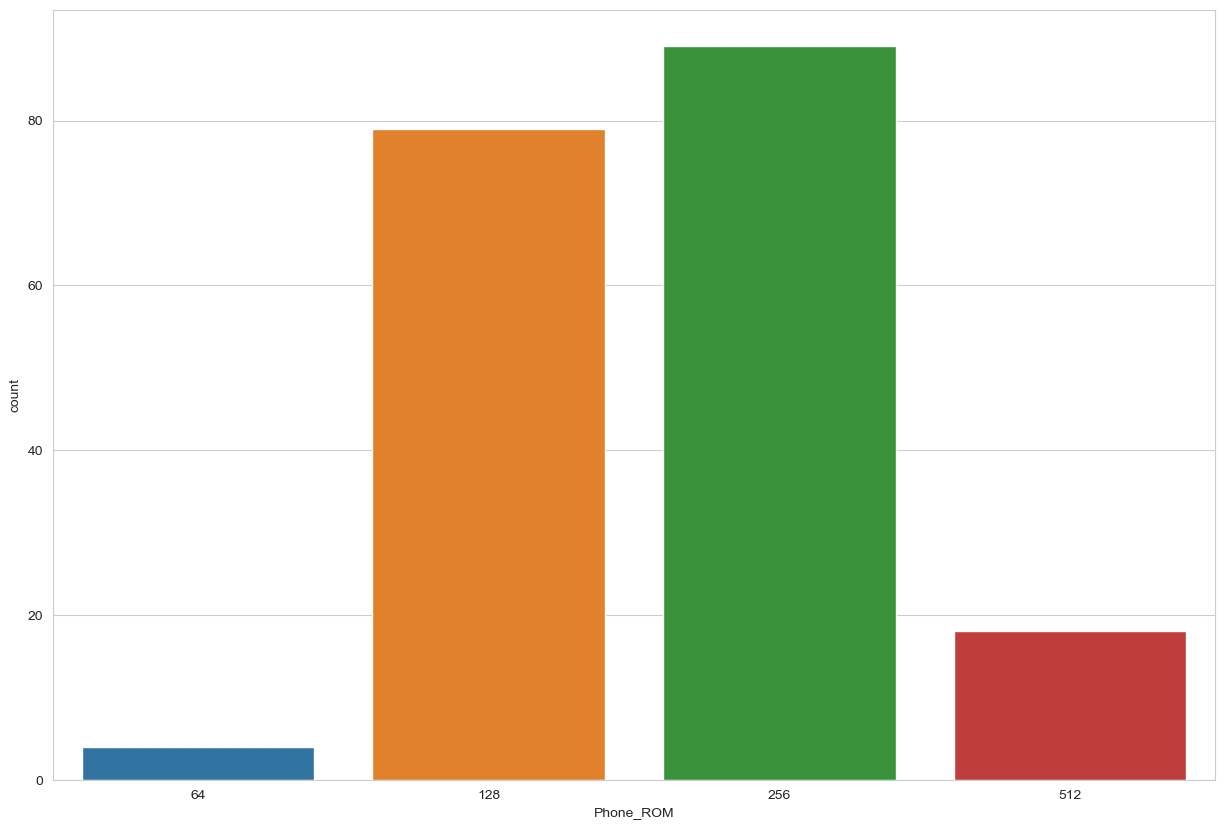

In [22]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Phone_ROM',data=df)

<Axes: xlabel='Phone_Primary_Cam', ylabel='count'>

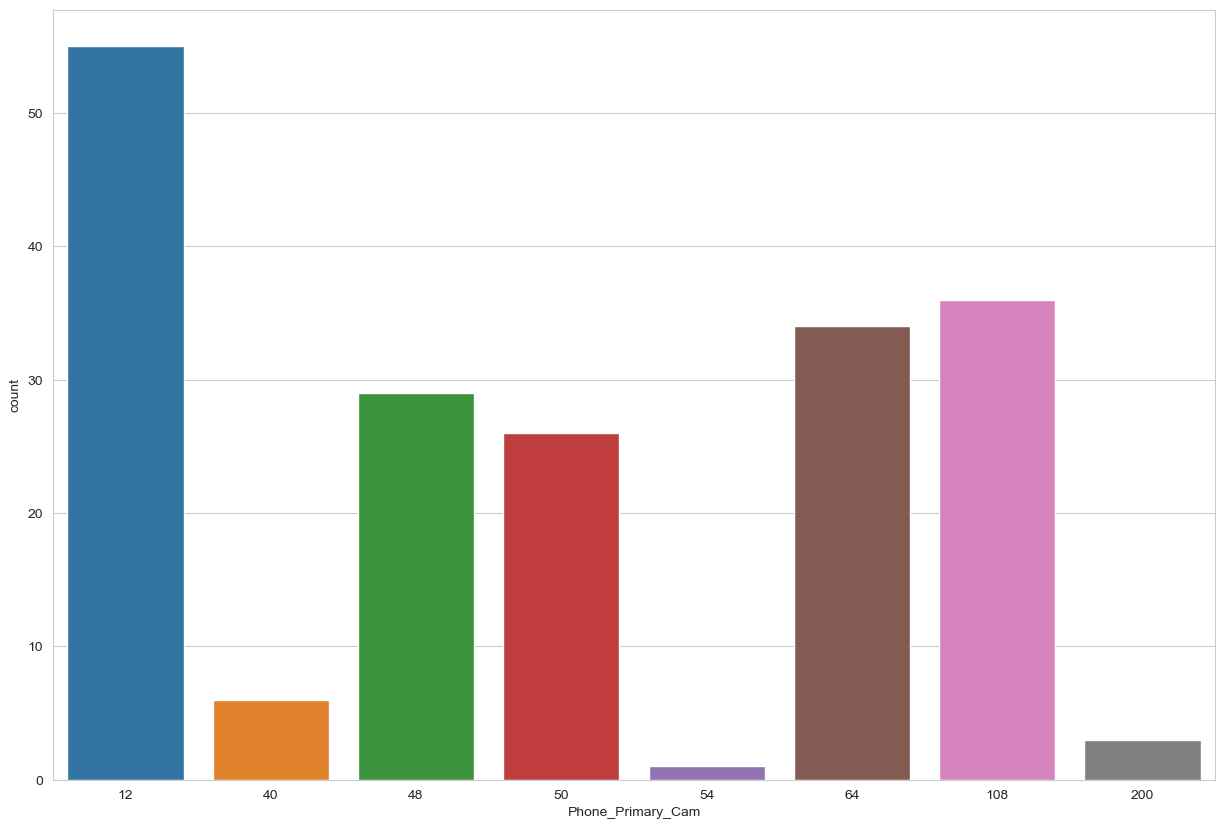

In [23]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Phone_Primary_Cam',data=df)

<Axes: xlabel='Phone_Selfi_Cam', ylabel='count'>

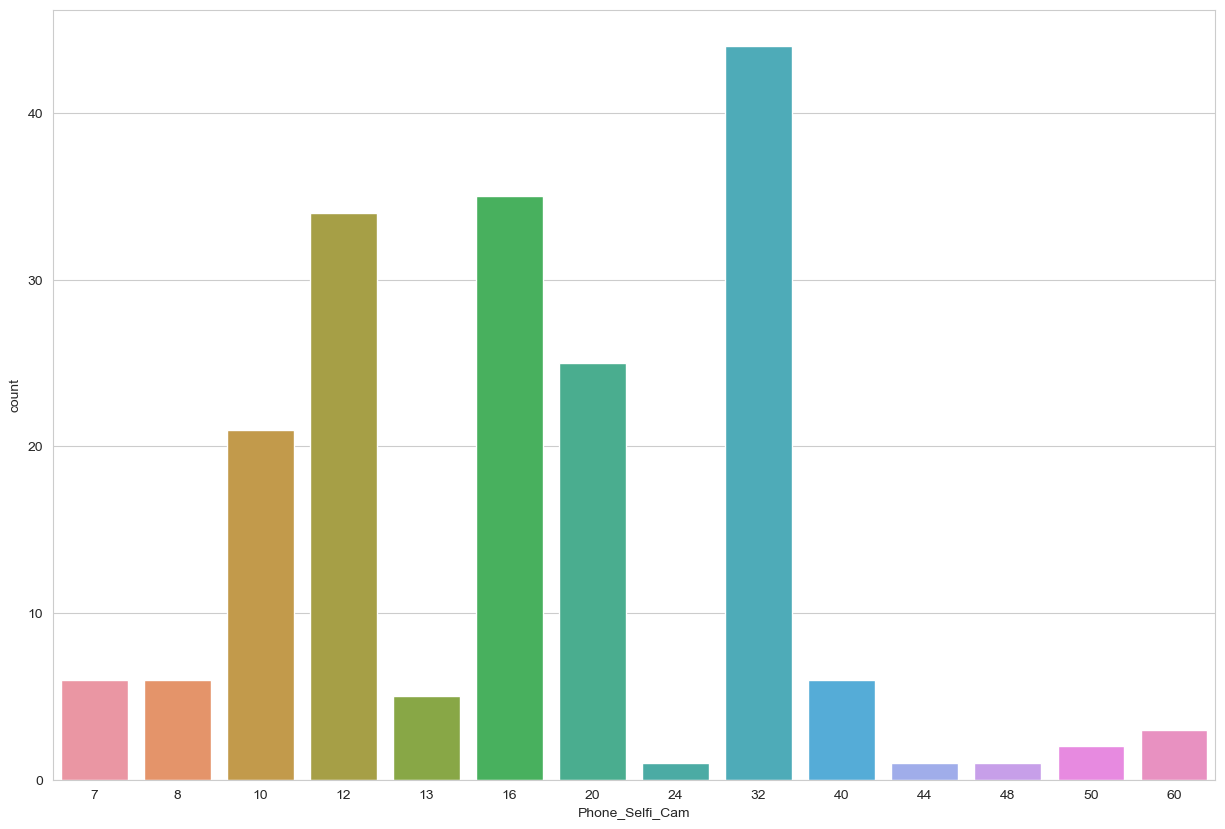

In [24]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Phone_Selfi_Cam',data=df)

<Axes: xlabel='Phone_RAM'>

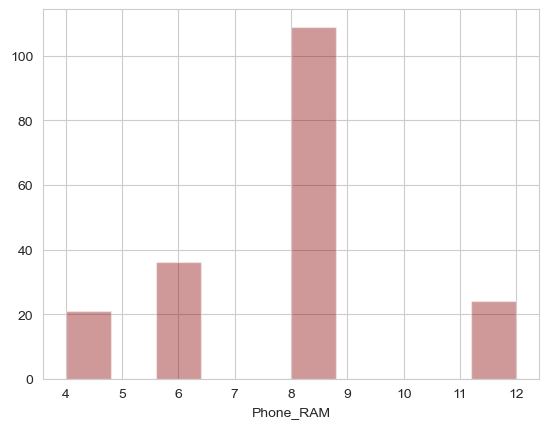

In [25]:
sns.distplot(df['Phone_RAM'].dropna(),kde=False,color='darkred',bins=10)

<Axes: xlabel='Phone_Battery_Power'>

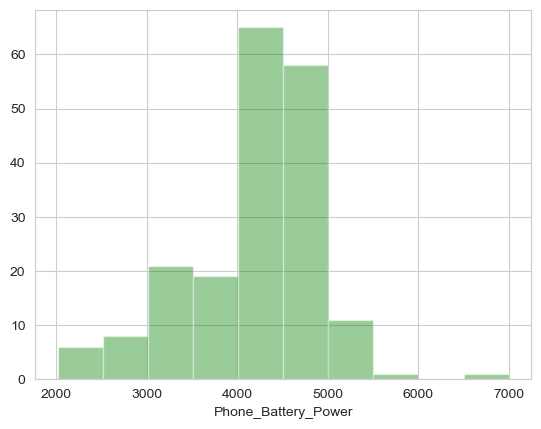

In [26]:
sns.distplot(df['Phone_Battery_Power'],kde=False,color='green',bins=10)

<Axes: xlabel='Phone_Prices'>

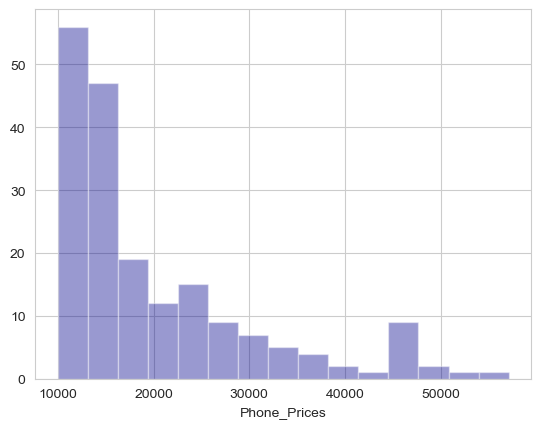

In [27]:
sns.distplot(df['Phone_Prices'],kde=False,color='darkblue',bins=15)

<Axes: xlabel='Phone_Battery_Power'>

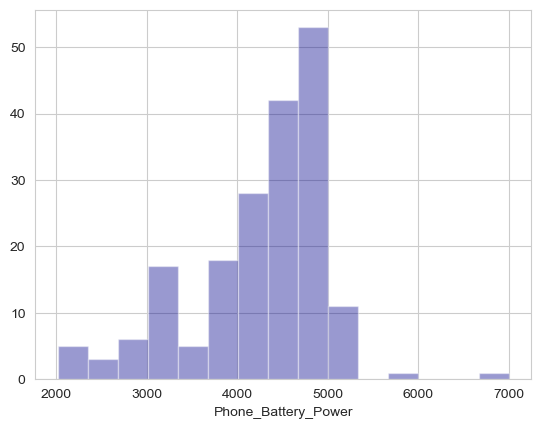

In [28]:
sns.distplot(df['Phone_Battery_Power'].dropna(),kde=False,color='darkblue',bins=15)

<Figure size 1000x1000 with 0 Axes>

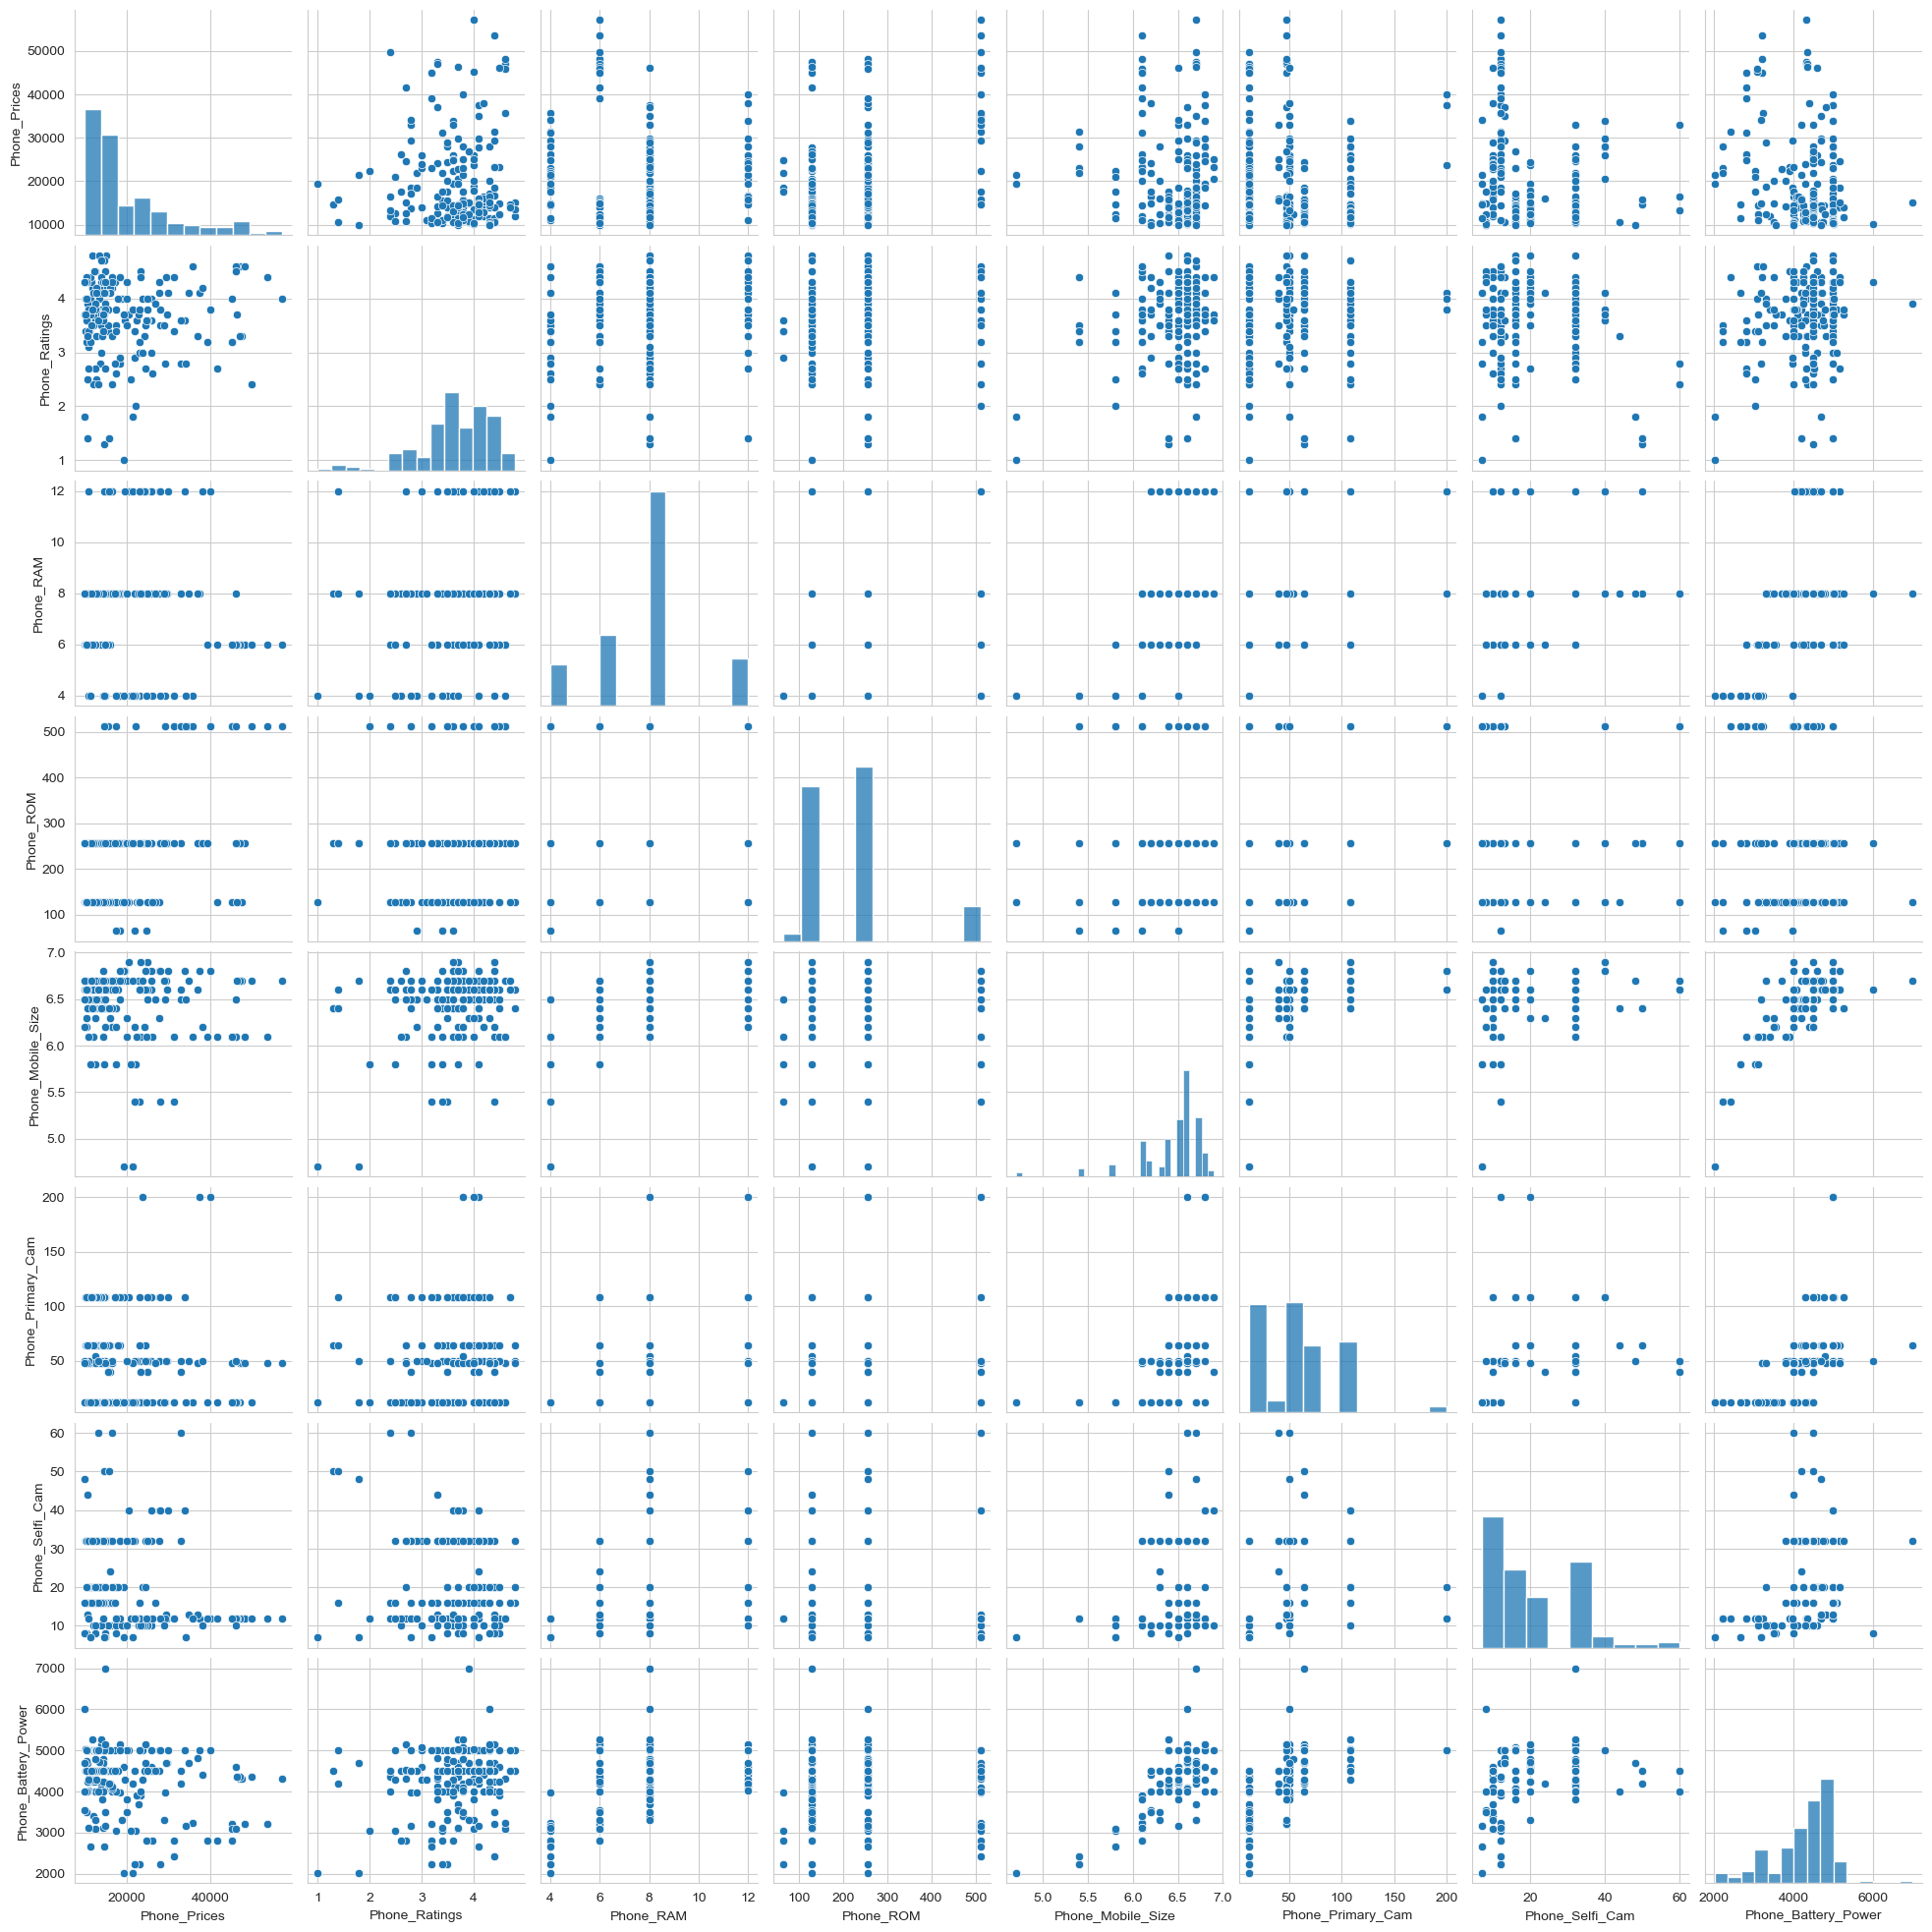

In [29]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df)

## Feature Selection

In [30]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [31]:
X = df.iloc[:,1:8]  # Independent columns
y = df.iloc[:,[0]] # Yarget column i.e price range 

In [32]:
X

,Phone_Ratings,Phone_RAM,Phone_ROM,Phone_Mobile_Size,Phone_Primary_Cam,Phone_Selfi_Cam,Phone_Battery_Power
1,3.8,12,512,6.8,200,12,5000
2,4.1,8,256,6.8,200,12,5000
3,4.0,6,512,6.7,48,12,4323
4,4.6,6,256,6.7,48,12,4323
5,3.6,12,512,6.8,108,40,5000
...,...,...,...,...,...,...,...
193,3.3,8,128,6.4,64,44,4000
194,3.8,6,128,6.4,108,32,5260
195,4.0,6,128,6.3,48,20,4000
196,3.5,8,256,6.7,108,16,4500


In [33]:
y

,Phone_Prices
1,39995
2,37490
3,57094
4,46987
5,33847
...,...
193,10584
194,11750
195,10450
196,11649


In [34]:
# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)

In [35]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [36]:
# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [37]:
featureScores

,Specs,Score
0,Phone_Ratings,20.767724
1,Phone_RAM,96.351598
2,Phone_ROM,9422.211480
3,Phone_Mobile_Size,2.827626
4,Phone_Primary_Cam,4345.810023
5,Phone_Selfi_Cam,997.561001
6,Phone_Battery_Power,22326.685227


In [38]:
print(featureScores.nlargest(4,'Score'))  #print 5 best features

                 Specs         Score
6  Phone_Battery_Power  22326.685227
2            Phone_ROM   9422.211480
4    Phone_Primary_Cam   4345.810023
5      Phone_Selfi_Cam    997.561001


### Feature Importance

In [39]:
# Fiting Feature Seclection using Ensemble Methods
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [40]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.2709824  0.07307422 0.08680411 0.14949013 0.10822816 0.10977895
 0.20164205]


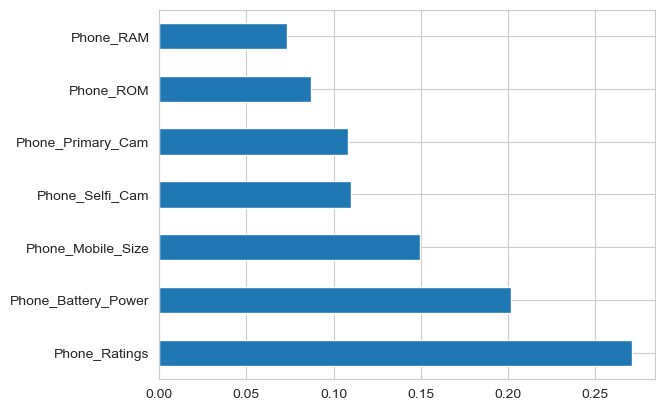

In [41]:
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Model Fitting 

### Random Forest Regressor 

In [42]:
# Value Assigning
X = df.iloc[:,[1,2,3,4,5,6,7]]
y = df.iloc[:,[0]]

In [43]:
X

,Phone_Ratings,Phone_RAM,Phone_ROM,Phone_Mobile_Size,Phone_Primary_Cam,Phone_Selfi_Cam,Phone_Battery_Power
1,3.8,12,512,6.8,200,12,5000
2,4.1,8,256,6.8,200,12,5000
3,4.0,6,512,6.7,48,12,4323
4,4.6,6,256,6.7,48,12,4323
5,3.6,12,512,6.8,108,40,5000
...,...,...,...,...,...,...,...
193,3.3,8,128,6.4,64,44,4000
194,3.8,6,128,6.4,108,32,5260
195,4.0,6,128,6.3,48,20,4000
196,3.5,8,256,6.7,108,16,4500


In [44]:
y

,Phone_Prices
1,39995
2,37490
3,57094
4,46987
5,33847
...,...
193,10584
194,11750
195,10450
196,11649


In [45]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [47]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train,y_train,)

RandomForestRegressor(random_state=42)

In [49]:
#Tahmin
y_pred = rf_model.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_test, y_pred))
#ilkel test hatası

5138.620507041657

In [51]:
#Model Tuning
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500]}

In [52]:
rf_model = RandomForestRegressor(random_state = 42)

In [53]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [54]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500]})

In [55]:
rf_cv_model.best_params_

{'max_depth': 7, 'max_features': 3, 'n_estimators': 500}

In [56]:
rf_tuned = RandomForestRegressor(max_depth  = 7, 
                                 max_features = 3, 
                                 n_estimators = 500)

In [57]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features=3, n_estimators=500)

In [58]:
y_pred = rf_tuned.predict(X_test)

In [59]:
np.sqrt(mean_squared_error(y_test, y_pred))

5564.221215536256

In [60]:
# Training Score
print("Training Accuracy:",rf_tuned.score(X_train,y_train)*100)

Training Accuracy: 91.4445873413504


In [61]:
# Testing Score
print("Testing Accuracy:",rf_tuned.score(X_test,y_test)*100)

Testing Accuracy: 72.8892722235361


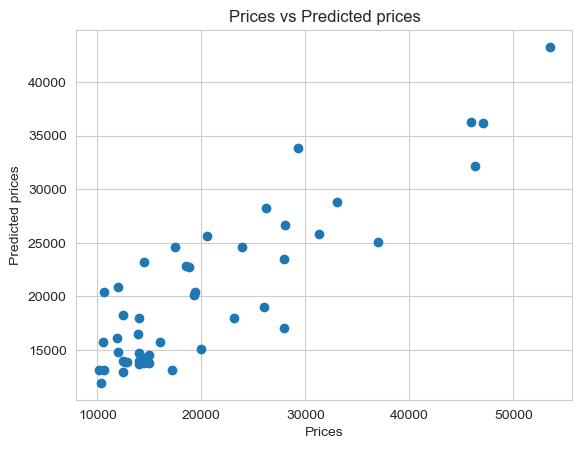

In [62]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [63]:
# Sample Prediction
rf_tuned.predict([[4.0,8,256,6.7,200,12,5000]])

array([30758.29215385])

In [164]:
rf_scores = cross_val_score(rf_tuned, X_train, y_train, cv=10)

# Çapraz doğrulama sonuçlarını görüntüleme
print("Çapraz Doğrulama Skorları:", rf_scores)
print("Ortalama Skor:", rf_scores.mean())

Çapraz Doğrulama Skorları: [ 0.42667836  0.60405261  0.80851998  0.77352592 -0.27457634  0.76444246
  0.70404512  0.5749115   0.8100836   0.45302088]
Ortalama Skor: 0.5644704100252964


### Support Vector Regressor

In [65]:
from sklearn.svm import SVR
svr_model = SVR().fit(X_train, y_train)

In [66]:
#Tahmin
y_pred = svr_model.predict(X_test)

In [67]:
np.sqrt(mean_squared_error(y_test, y_pred))

11787.690322241499

In [68]:
#Model Tuning
svr_params = {"C": [100000000,120000000]}
svr_cv_model = GridSearchCV(svr_model,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(), param_grid={'C': [100000000, 120000000]})

In [69]:
pd.Series(svr_cv_model.best_params_)[0]

100000000

In [70]:
svr_tuned = SVR(C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)

In [71]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

9721.440081947472

In [72]:
# Training Score
print("Training Accuracy:",svr_tuned.score(X_train,y_train)*100)

Training Accuracy: 33.64153646634138


In [73]:
# Testing Score
print("Testing Accuracy:",svr_tuned.score(X_test,y_test)*100)

Testing Accuracy: 17.245120991291184


In [74]:
# Sample Prediction
svr_tuned.predict([[4.0,8,256,6.7,200,12,5000]])


array([19502.20734159])

In [165]:
svr_scores = cross_val_score(svr_tuned, X_train, y_train, cv=10)

# Çapraz doğrulama sonuçlarını görüntüleme
print("Çapraz Doğrulama Skorları:", svr_scores)
print("Ortalama Skor:", svr_scores.mean())

Çapraz Doğrulama Skorları: [-0.08940678  0.45474138  0.30115796  0.54733608 -0.37091825  0.11671805
 -0.33051569  0.23786273  0.56018071  0.49245844]
Ortalama Skor: 0.19196146263725664


### Gradient Boosting Machines

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

In [78]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [79]:
# Tahmin
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

5074.045798774901

In [80]:
# Model Tuning
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [81]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [82]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}

In [83]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.01,  
                                      max_depth = 3, 
                                      n_estimators = 500, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [84]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

5345.436154361726

In [85]:
# Training Score
print("Training Accuracy:",gbm_tuned.score(X_train,y_train)*100)

Training Accuracy: 90.34503247271421


In [86]:
# Testing Score
print("Testing Accuracy:",gbm_tuned.score(X_test,y_test)*100)

Testing Accuracy: 74.9793438835391


In [87]:
# Sample Prediction
gbm_tuned.predict([[4.0,8,256,6.7,200,12,5000]])

array([33532.60013742])

In [166]:
gbm_scores = cross_val_score(gbm_tuned, X_train, y_train, cv=10)

# Çapraz doğrulama sonuçlarını görüntüleme
print("Çapraz Doğrulama Skorları:", gbm_scores)
print("Ortalama Skor:", gbm_scores.mean())

Çapraz Doğrulama Skorları: [ 0.53496792  0.69374955  0.80707066  0.77503562 -0.31889401  0.80950703
  0.65881549  0.60748601  0.80498519  0.58658022]
Ortalama Skor: 0.5959303669702309


### XGBoost

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [90]:
import xgboost as xgb

In [91]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [92]:
from xgboost import XGBRegressor

In [93]:
xgb_model = XGBRegressor().fit(X_train, y_train)

In [94]:
# Tahmin
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

5399.8604268445815

In [95]:
#Model Tuning
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}

In [96]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.1, 0.01, 0.5],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [97]:
xgb_cv.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 1000}

In [98]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.4, 
                         learning_rate = 0.01, 
                         max_depth = 6, 
                         n_estimators =1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [99]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

5452.5641633308305

In [100]:
# Training Score
print("Training Accuracy:",xgb_tuned.score(X_train,y_train)*100)

Training Accuracy: 98.06843677331159


In [101]:
# Testing Score
print("Testing Accuracy:",xgb_tuned.score(X_test,y_test)*100)

Testing Accuracy: 73.96641543215988


In [167]:
xgb_scores = cross_val_score(xgb_tuned, X_train, y_train, cv=10)

# Çapraz doğrulama sonuçlarını görüntüleme
print("Çapraz Doğrulama Skorları:", xgb_scores)
print("Ortalama Skor:", xgb_scores.mean())

Çapraz Doğrulama Skorları: [0.74098283 0.61653737 0.86842279 0.72815205 0.10091927 0.76395007
 0.58477987 0.59858328 0.79789679 0.74632242]
Ortalama Skor: 0.6546546744161141


### Light GBM

In [122]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

In [123]:
# Tahmin
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)
np.sqrt(mean_squared_error(y_test, y_pred))

7155.136932114598

In [124]:
# Model Tuning
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [125]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [126]:
lgbm_cv_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.5,
 'max_depth': 1,
 'n_estimators': 40}

In [127]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 7, 
                           n_estimators = 40,
                          colsample_bytree = 0.6)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [128]:
y_pred = lgbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

7238.410649577893

In [129]:
# Training Score
print("Training Accuracy:",lgbm_tuned.score(X_train,y_train)*100)

Training Accuracy: 63.177170911767135


In [131]:
# Testing Score
print("Testing Accuracy:",lgbm_tuned.score(X_test,y_test)*100)

Testing Accuracy: 54.120483093051256


In [132]:
# Sample Prediction
lgbm_tuned.predict([[4.0,8,256,6.7,200,12,5000]])

array([36819.83923291])

In [168]:
lgbm_scores = cross_val_score(lgbm_tuned, X_train, y_train, cv=10)

# Çapraz doğrulama sonuçlarını görüntüleme
print("Çapraz Doğrulama Skorları:", lgbm_scores)
print("Ortalama Skor:", lgbm_scores.mean())

Çapraz Doğrulama Skorları: [ 0.4888298   0.33998439  0.537799    0.55097814 -0.4748979   0.73171818
  0.57651886  0.35762609  0.46977913  0.48596771]
Ortalama Skor: 0.40643033883494983


# T-Test

In [177]:
import numpy as np
from scipy import stats
import pandas as pd

lgbm_scores = [0.4888298, 0.33998439, 0.537799, 0.55097814, -0.4748979, 0.73171818, 0.57651886, 0.35762609, 0.46977913, 0.48596771]
xgb_scores = [0.74098283, 0.61653737, 0.86842279, 0.72815205, 0.10091927, 0.76395007, 0.58477987, 0.59858328, 0.79789679, 0.74632242]
gbm_scores = [0.53496792,  0.69374955,  0.80707066,  0.77503562,-0.31889401,  0.80950703, 0.65881549,  0.60748601,  0.80498519,  0.58658022]
svr_scores = [-0.08940678,  0.45474138,  0.30115796,  0.54733608, -0.37091825,  0.11671805, -0.33051569,  0.23786273,  0.56018071,  0.49245844]
rf_scores = [0.42667836,  0.60405261,  0.80851998,  0.77352592, -0.27457634,  0.76444246, 0.70404512,  0.5749115,   0.8100836,   0.45302088]


# Algoritma adları ve başarı değerleri
algorithms = ["Light GBM", "XGBoost", "Gradient Boosting Machines", "Support Vector Regressor", "Random Forest Regressor"]
success_values = [lgbm_scores, xgb_scores, gbm_scores, svr_scores, rf_scores]

# Tüm algoritma kombinasyonlarını oluştur
combinations = [(i, j) for i in range(len(algorithms)) for j in range(i+1, len(algorithms))]

# T-test sonuçlarını saklamak için bir DataFrame oluştur
results = pd.DataFrame(columns=['Algorithm A', 'Algorithm B', 'T-Statistic', 'P-Value'])

# T-test uygula ve sonuçları DataFrame'e ekle
for combination in combinations:
    algorithm_a = combination[0]
    algorithm_b = combination[1]
    values_a = success_values[algorithm_a]
    values_b = success_values[algorithm_b]
    t_statistic, p_value = stats.ttest_ind(values_a, values_b)
    results = results.append({
        'Algorithm A': algorithms[algorithm_a],
        'Algorithm B': algorithms[algorithm_b],
        'T-Statistic': t_statistic,
        'P-Value': p_value
    }, ignore_index=True)

# Sonuçları tablo olarak göster
print(results)


                  Algorithm A                 Algorithm B  T-Statistic  \
0                   Light GBM                     XGBoost    -1.998030   
1                   Light GBM  Gradient Boosting Machines    -1.273147   
2                   Light GBM    Support Vector Regressor     1.409589   
3                   Light GBM     Random Forest Regressor    -1.078186   
4                     XGBoost  Gradient Boosting Machines     0.464925   
5                     XGBoost    Support Vector Regressor     3.554013   
6                     XGBoost     Random Forest Regressor     0.729451   
7  Gradient Boosting Machines    Support Vector Regressor     2.625755   
8  Gradient Boosting Machines     Random Forest Regressor     0.212077   
9    Support Vector Regressor     Random Forest Regressor    -2.456223   

    P-Value  
0  0.061052  
1  0.219163  
2  0.175705  
3  0.295188  
4  0.647560  
5  0.002268  
6  0.475112  
7  0.017144  
8  0.834430  
9  0.024427  


'T-Statistic' ve 'P-Value' değerlerini karşılaştırdıktan sonra aşağıdaki adımları izleyebiliriz:

    1 - T-Statistic değeri: T-istatistiği, iki grup arasındaki farkın istatistiksel olarak ne kadar anlamlı olduğunu ölçer. Pozitif bir T-Statistic değeri, grupların arasında anlamlı bir fark olduğunu gösterirken, negatif bir değer ise bir grup lehine anlamlı bir fark olduğunu gösterebilir. T-Statistic değeri, büyüklüğüne bağlı olarak değerlendirilebilir. Örneğin, daha yüksek bir T-Statistic değeri, gruplar arasındaki farkın daha belirgin olduğunu gösterebilir.

    2 - P-Value değeri: P-değeri, t-testinin istatistiksel olarak anlamlı olduğunu gösteren bir ölçüdür. P-değeri, iki grup arasındaki farkın rastgele oluşma olasılığına karşılık gelir. Genellikle, belirlenen bir anlamlılık düzeyi (örneğin, p < 0.05) kullanılarak p-değeri değerlendirilir. Eğer p-değeri, belirlenen anlamlılık düzeyinden küçükse, yani p < 0.05 ise, bu durumda iki grup arasındaki farkın istatistiksel olarak anlamlı olduğu kabul edilir.

Sonuçları değerlendirirken, aşağıdaki genel yaklaşımı kullanabiliriz:

* Eğer T-Statistic değeri pozitif ve p-değeri belirlenen anlamlılık düzeyinden küçükse (p < 0.05), o zaman iki grup arasında anlamlı bir fark olduğu ve bir algoritmanın diğerine göre daha iyi performans gösterdiği söylenebilir.

* Eğer T-Statistic değeri negatif ve p-değeri belirlenen anlamlılık düzeyinden küçükse (p < 0.05), o zaman diğer algoritmanın daha iyi performans gösterdiği ve iki grup arasında anlamlı bir fark olduğu söylenebilir.

* Eğer p-değeri belirlenen anlamlılık düzeyinden büyükse (p ≥ 0.05), o zaman istatistiksel olarak anlamlı bir farkın olmadığı ve algoritmalar arasında performans açısından bir fark olmadığı söylenebilir.

Tabii ki, bu sonuçlar yalnızca istatistiksel analizin sonuçlarıdır ve gerçek dünya durumunu tam olarak yansıtmayabilir. Diğer faktörleri ve bağlamı dikkate alarak sonuçları yorumlamanız önemlidir.